In [4]:
import pandas as pd

KNN

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [7]:
df.shape

(6991, 41)

# Select your features (columns)

In [8]:
# Set features. This will also be used as your x values.
Actual_Results = df["koi_disposition"]
Feature_Set = df.drop("koi_disposition", axis=1)
#Feature_Set
Feature_Names = Feature_Set.columns
Feature_Names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [9]:
#using Actual_Results as the y-values
#Actual_Results
X=Feature_Set
y=Actual_Results

In [10]:
#identifying features 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.13136534, 0.16514742, 0.1231907 , 0.05804725, 0.01754582,
       0.0137292 , 0.01374388, 0.01254083, 0.0217311 , 0.01981101,
       0.01231275, 0.01242558, 0.01004659, 0.01733845, 0.02704199,
       0.0312654 , 0.02166179, 0.01352521, 0.0142853 , 0.01306784,
       0.01093454, 0.01094143, 0.01494484, 0.00835891, 0.00948927,
       0.00825866, 0.0352368 , 0.00996779, 0.00993385, 0.01982482,
       0.01671643, 0.01130549, 0.01016538, 0.01348978, 0.00894839,
       0.01119555, 0.00910338, 0.01165672, 0.00983269, 0.00987184])

In [11]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.165147
koi_fpflag_nt        0.131365
koi_fpflag_co        0.123191
koi_fpflag_ec        0.058047
koi_model_snr        0.035237
koi_duration_err2    0.031265
koi_duration_err1    0.027042
koi_time0bk_err1     0.021731
koi_depth            0.021662
koi_steff_err1       0.019825
dtype: float64

In [12]:
# Set features based on feature importances
X = df[feat_imp.index]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [22]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.892, Test: 0.860
k: 8, Train: 0.884, Test: 0.869
k: 11, Train: 0.876, Test: 0.865
k: 14, Train: 0.873, Test: 0.869
k: 17, Train: 0.871, Test: 0.870
k: 20, Train: 0.870, Test: 0.867
k: 23, Train: 0.867, Test: 0.869
k: 26, Train: 0.866, Test: 0.867
k: 29, Train: 0.864, Test: 0.871
k: 32, Train: 0.865, Test: 0.872


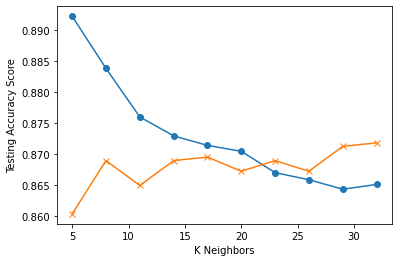

In [24]:
import matplotlib.pyplot as plt

# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=17

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [25]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

best_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [26]:
# Train the model with GridSearch
best_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             scoring='accuracy', verbose=1)

In [27]:
print(best_model.best_params_)
print(best_model.best_score_)

{'n_neighbors': 24}
0.8599891146589259


In [28]:
# Make predictions
grid_predictions = best_model.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":grid_predictions})
df_grid.head()

,Actual,Predicted
1213,CONFIRMED,CANDIDATE
5220,FALSE POSITIVE,FALSE POSITIVE
6688,FALSE POSITIVE,FALSE POSITIVE
2031,CONFIRMED,CONFIRMED
5824,FALSE POSITIVE,FALSE POSITIVE


In [29]:
# Score the model
best_model.score(X_test_scaled, y_test)

0.8661327231121282

# Save the Model

In [30]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn__NN.sav'
joblib.dump(best_model, filename)

['knn__NN.sav']

In [31]:
# Print Classification Report.
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.75      0.66      0.70       404
     CONFIRMED       0.71      0.78      0.75       435
FALSE POSITIVE       0.99      1.00      0.99       909

      accuracy                           0.87      1748
     macro avg       0.82      0.81      0.81      1748
  weighted avg       0.87      0.87      0.86      1748

